In [327]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import set_config
from sklearn.decomposition import PCA

In [328]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

print(np.__version__)  # Debe ser 1.24.4
print(pd.__version__)  # Debe ser 2.0.3
print(sklearn.__version__)  # Debe ser la última versión
print(sns.__version__)  # Debe ser la última versión


1.24.4
2.0.3
1.5.1
0.13.2


In [329]:
import numpy as np
print(np.__version__)


1.24.4


#### CARGAMOS EL DATASET Y EXPLORAMOS LOS DATOS

In [330]:
# Cargar el dataset desde un archivo CSV
df = pd.read_csv('insurance.csv')

# Mostramos las primeras 5filas del dataset
print("Primeras 5filas del dataset:")
print(df.head(5))

# Info nos dara informacion general
print("\nInformación general del dataset:")
print(df.info())

# Describir las estadísticas del dataset
print("\nEstadísticas descriptivas del dataset:")
print(df.describe(include='all'))


Primeras 5filas del dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Estadísticas descriptivas d

In [331]:
# Verificar y manejar valores nulos
print("\nValores nulos en cada columna:")
print(df.isnull().sum())

# Verificar y manejar duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())

# Eliminar filas duplicadas
df = df.drop_duplicates()



Valores nulos en cada columna:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Número de filas duplicadas:
1


In [332]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [333]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [334]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [335]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


#### APLICAMOS FEATURE ENGINNERING

In [336]:
# Crear características adicionales
df['bmi_smoker'] = df['bmi'] * df['smoker'].apply(lambda x: 1 if x == 'yes' else 0)


In [337]:
# Dividir el conjunto de datos en características (X) y la columna objetivo (y)
X = df.drop(columns=['charges'])
y = df['charges']

# Dividir en conjunto de entrenamiento y conjunto de prueba en 80% y 20% para el conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [338]:
# Detectar valores nulos
print("\nValores nulos en cada columna:")
print(df.isnull().sum())

# Mostrar filas con valores nulos
print("\nFilas con valores nulos:")
print(df[df.isnull().any(axis=1)])


Valores nulos en cada columna:
age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
bmi_smoker    0
dtype: int64

Filas con valores nulos:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, bmi_smoker]
Index: []


#### CREAMOS PIPELINE PARA UNA REGRESION LINEAL MULTIPLE

In [339]:
# Seleccionar las columnas numéricas y categóricas
numeric_features = ['age', 'bmi', 'children', 'bmi_smoker']
categorical_features = ['sex', 'smoker', 'region']

# Crear transformadores para el preprocesamiento
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first')) # drop='first' para evitar la multicolinealidad
])

# Combinar transformadores en un preprocesador ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un pipeline completo con preprocesamiento y modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=1, include_bias=False)),
    ('regressor', LinearRegression())
])

# Visualizar el pipeline
set_config(display='diagram')
pipeline


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children',
                                                   'bmi_smoker']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('poly', PolynomialFeatures(degree=1, include_bias=False)),
                ('regressor', LinearRegression())])

In [340]:
# Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Guardar el modelo entrenado en un archivo
joblib.dump(pipeline, 'linear_regression_model.pkl')


Mean Squared Error: 20910602.63076841
R^2 Score: 0.8862045574393045


['linear_regression_model.pkl']

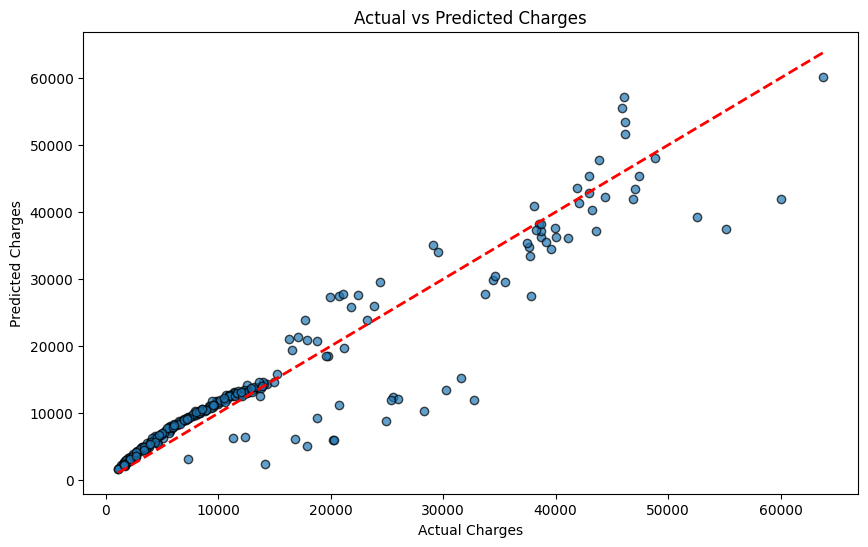

In [341]:
# Comparar los valores reales vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--', linewidth=2)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.show()

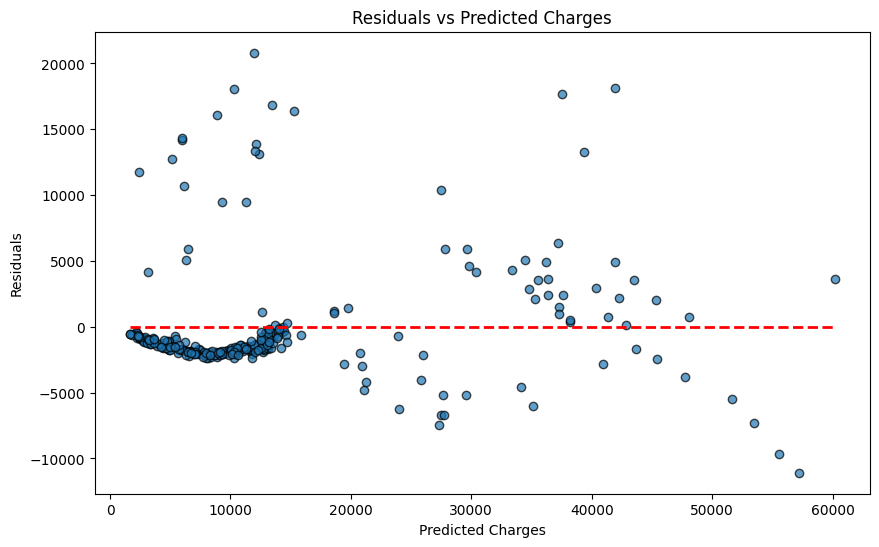

In [342]:
# Calcular los errores residuales
residuals = y_test - y_pred

# Gráfico de los errores residuales
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, edgecolor='k', alpha=0.7)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='r', linestyle='--', linewidth=2)
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Charges')
plt.show()

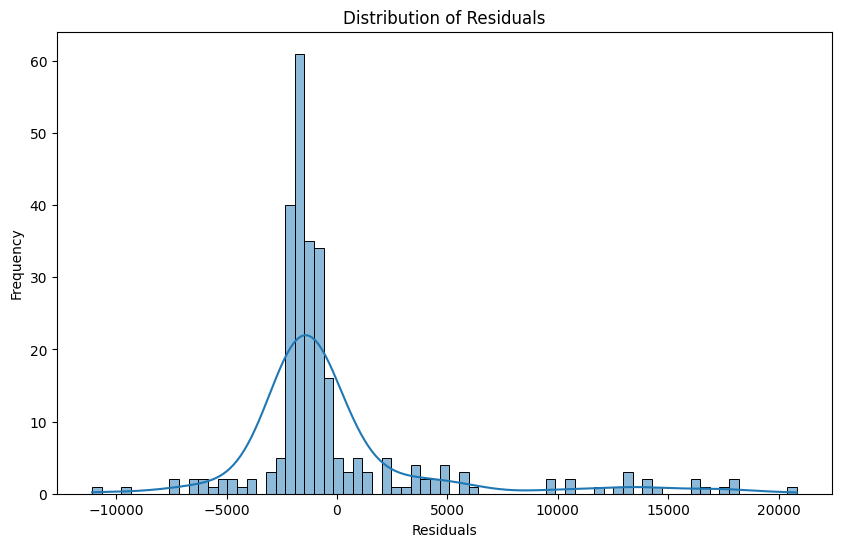

In [343]:
# Histograma de los residuos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

#### ANALISIS DE CORRELACION
##### COMO SE OBSERVA EXISTE UNA ALTA CORRELACION POSITIVA ENTRE CHARGER BMI_SMOKER Y SMOKER_YES. 

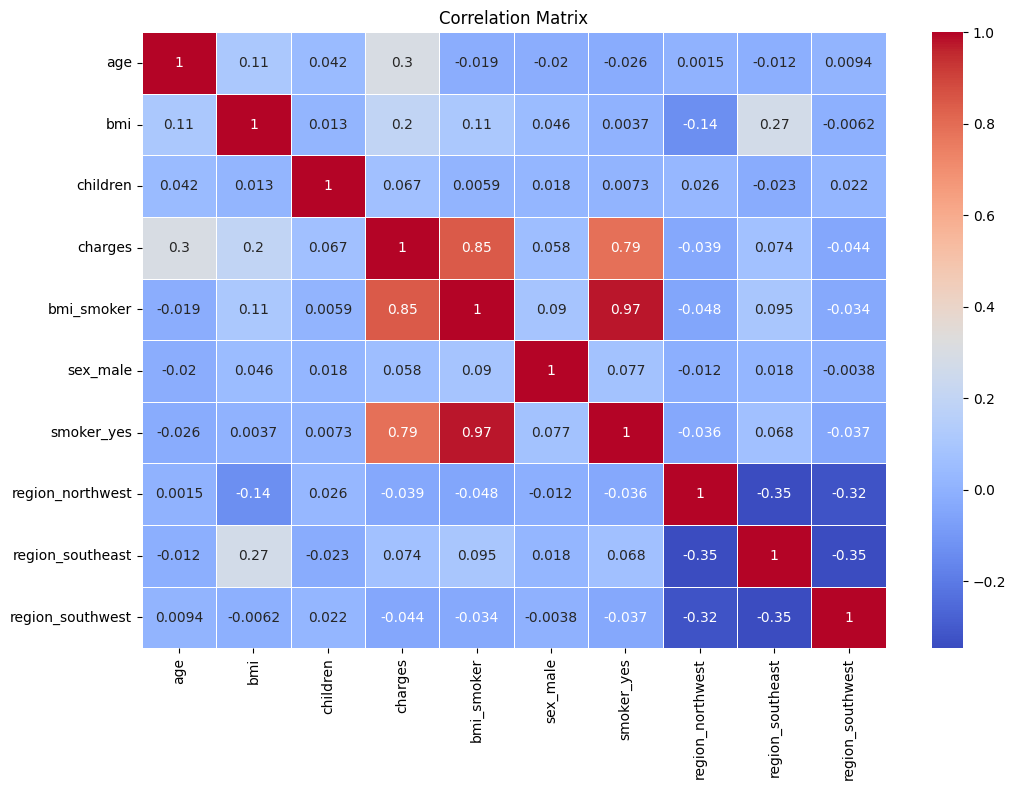

In [344]:
# Convertir variables categóricas en variables dummy
df_dummies = pd.get_dummies(df, drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = df_dummies.corr()

# Crear una gráfica de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### APLICACION DE PCA

In [366]:
X = df.drop(columns=['charges'])
y = df['charges']
X_processed = preprocessor.fit_transform(X)
from sklearn.decomposition import PCA

# Aplicar PCA con todos los componentes
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_processed)


Explained Variance Ratio: [0.24665052 0.21999722 0.19914822 0.17501151 0.04972933]
Cumulative Variance: [0.24665052 0.46664773 0.66579595 0.84080746 0.8905368 ]


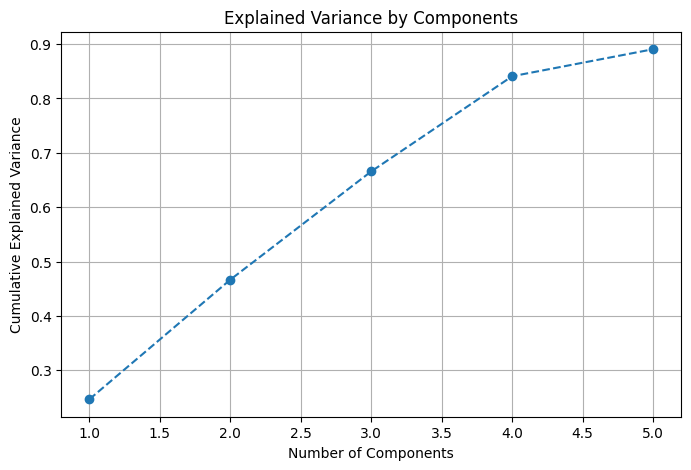

In [368]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Varianza acumulada
cumulative_variance = np.cumsum(explained_variance)
print("Cumulative Variance:", cumulative_variance)

# Graficar la varianza explicada
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid(True)
plt.show()



### SI QUEREMOS EXPLICAR A MENOS EL 60% DE VARIABILIDAD LO RECOMENDABLE SERIA USAR LOS PRIMEROS 3 COMPONENTES PRINCIPALES

In [369]:
# Cargar de características
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Crear un DataFrame de las cargas
feature_names = numeric_features + preprocessor.transformers_[1][1]['onehot'].get_feature_names_out(categorical_features).tolist()
df_loadings = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=feature_names)

print(df_loadings)


                       PC1       PC2       PC3       PC4       PC5
age               0.208950  0.747478 -0.145256  0.614006 -0.000185
bmi               0.588705  0.423855 -0.310312 -0.609542  0.016671
children          0.090696  0.343827  0.920426 -0.164170 -0.009440
bmi_smoker        0.844572 -0.447248  0.136601  0.259204 -0.006269
sex_male          0.056891 -0.020607  0.012565 -0.013818  0.362518
smoker_yes        0.313520 -0.195215  0.068489  0.130535 -0.006427
region_northwest -0.056381 -0.013531  0.034620  0.049932 -0.073039
region_southeast  0.110134  0.024345 -0.053410 -0.097778 -0.196893
region_southwest -0.017418  0.013191  0.009664  0.002216  0.267958


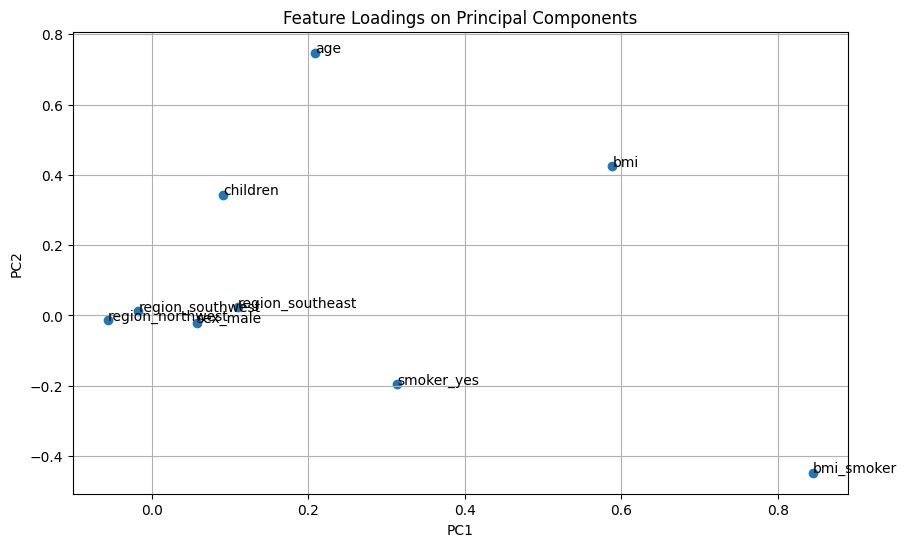

In [370]:
plt.figure(figsize=(10, 6))
plt.scatter(df_loadings['PC1'], df_loadings['PC2'])

for i, feature in enumerate(df_loadings.index):
    plt.annotate(feature, (df_loadings['PC1'][i], df_loadings['PC2'][i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Feature Loadings on Principal Components')
plt.grid(True)
plt.show()


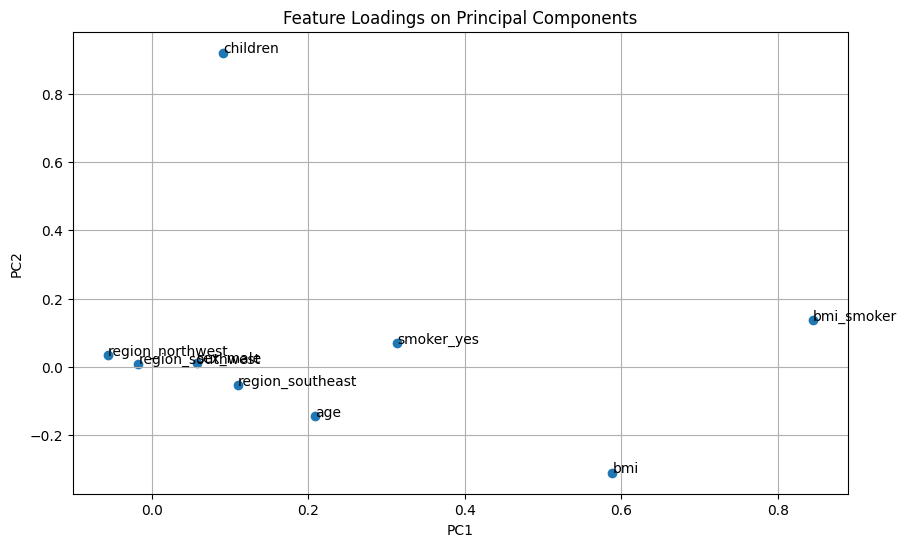

In [371]:
plt.figure(figsize=(10, 6))
plt.scatter(df_loadings['PC1'], df_loadings['PC3'])

for i, feature in enumerate(df_loadings.index):
    plt.annotate(feature, (df_loadings['PC1'][i], df_loadings['PC3'][i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Feature Loadings on Principal Components')
plt.grid(True)
plt.show()

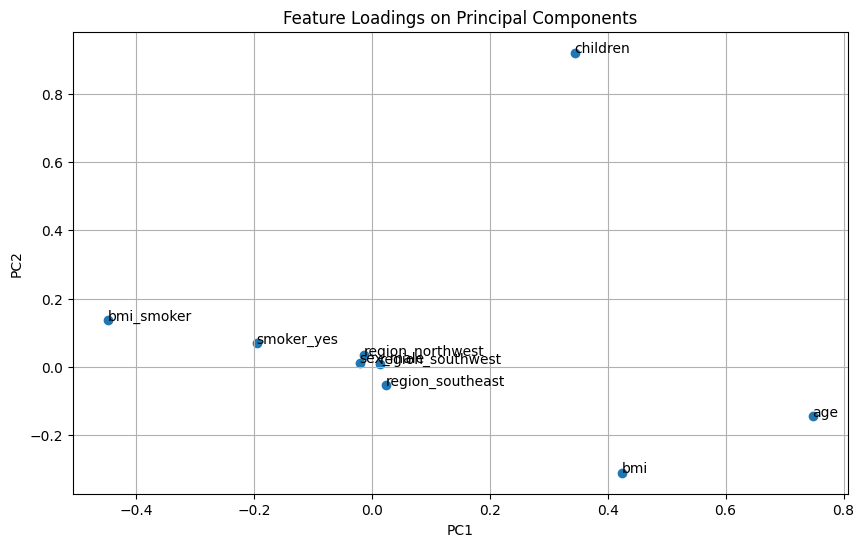

In [372]:
plt.figure(figsize=(10, 6))
plt.scatter(df_loadings['PC2'], df_loadings['PC3'])

for i, feature in enumerate(df_loadings.index):
    plt.annotate(feature, (df_loadings['PC2'][i], df_loadings['PC3'][i]))

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Feature Loadings on Principal Components')
plt.grid(True)
plt.show()

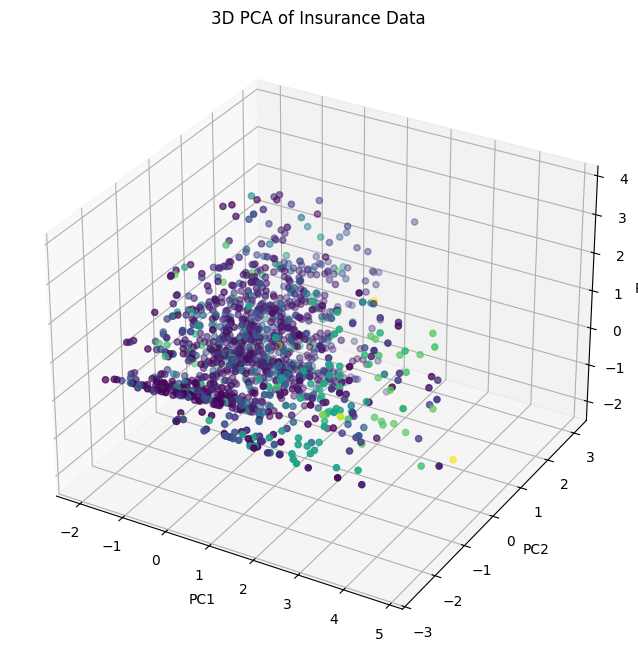

,PC1,PC2,PC3,PC4,PC5,charges
0,0.879904,-2.368060,-0.194180,0.115986,0.153970,16884.92400
1,-0.341929,-0.642293,-0.137163,-1.575575,0.005450,1725.55230
2,-0.138948,0.360159,1.331797,-1.316561,-0.030518,4449.46200
3,-1.322221,-0.922741,-0.406088,0.615450,0.208841,21984.47061
4,-0.797904,-0.563650,-0.711149,-0.092366,0.242781,3866.85520
...,...,...,...,...,...,...
95,0.076283,0.141533,-0.450323,-1.504523,-0.701962,3766.88380
96,-0.147839,1.545363,1.224828,0.258556,0.162296,12105.32000
97,0.479690,1.266240,-1.518621,-0.179501,0.044979,10226.28420
98,0.275221,-0.779504,-0.255170,2.509253,0.307171,22412.64850


In [373]:
from mpl_toolkits.mplot3d import Axes3D

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['charges'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los tres primeros componentes principales
ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['charges'], cmap='viridis')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D PCA of Insurance Data')
plt.show()
df_pca.head(100)

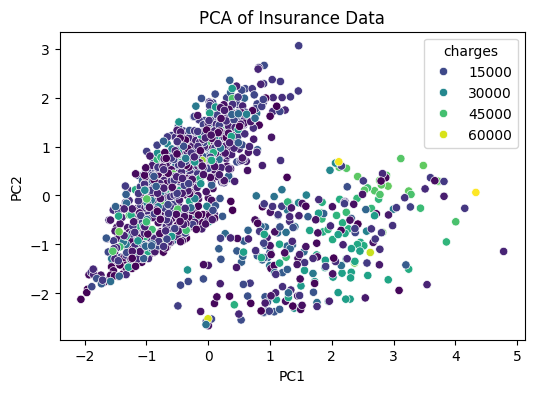

In [374]:
# Visualización de los componentes principales
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='charges', palette='viridis')
plt.title('PCA of Insurance Data')
plt.show()


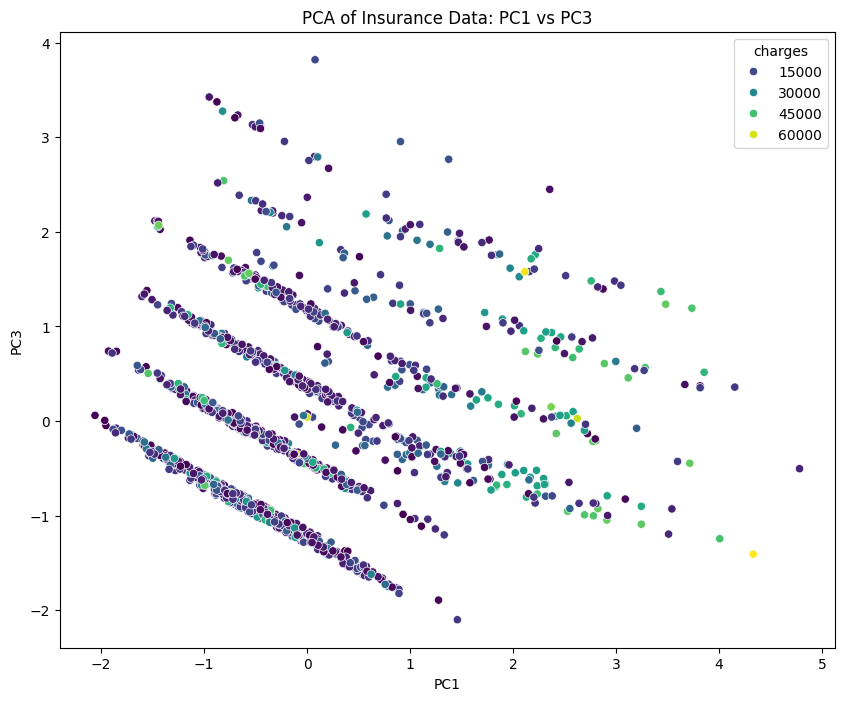

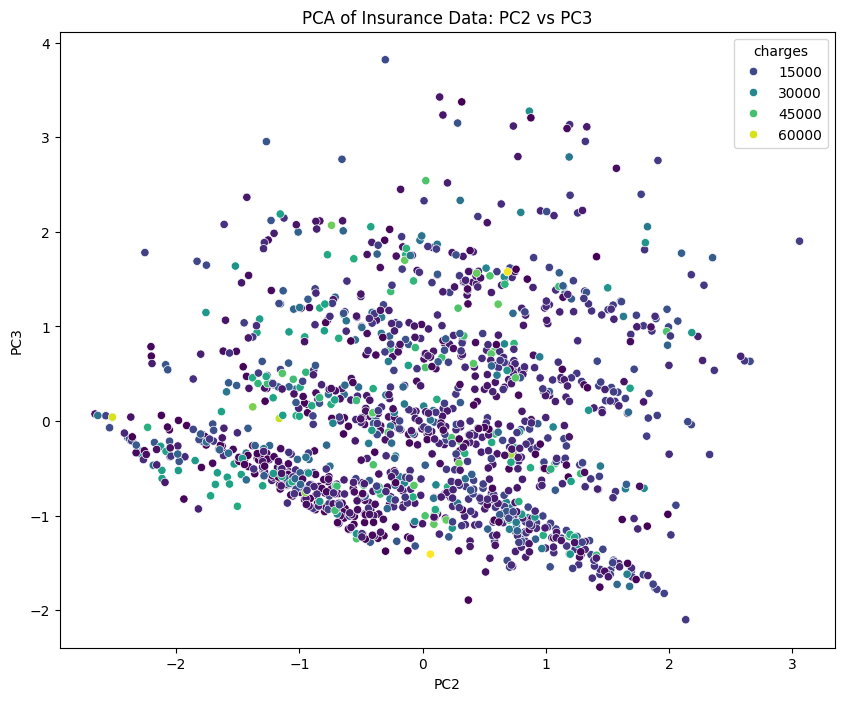

In [375]:
# Visualización de PC1 vs PC3
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC3', hue='charges', palette='viridis')
plt.title('PCA of Insurance Data: PC1 vs PC3')
plt.show()

# Visualización de PC2 vs PC3
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC2', y='PC3', hue='charges', palette='viridis')
plt.title('PCA of Insurance Data: PC2 vs PC3')
plt.show()

In [376]:
df.isnull().sum()

age           0
sex           0
bmi           0
children      0
smoker        0
region        0
charges       0
bmi_smoker    0
dtype: int64

In [377]:
df_dummies.isnull().sum()

age                 0
bmi                 0
children            0
charges             0
bmi_smoker          0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [378]:
# Si decides eliminar filas con valores nulos en la columna 'charges'
df_pca = df_pca.dropna(subset=['charges'])

# Dividir los datos en conjunto de entrenamiento y prueba
X1 = df_pca.drop('charges', axis=1)
y1 = df_pca['charges']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
df_pca = df_pca.dropna(subset=['charges'])
df_pca.isnull().sum()

# Definir una función para entrenar y evaluar modelos de regresión
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Train MSE: {mse_train:.2f}, Test MSE: {mse_test:.2f}")
    print(f"Train R^2: {r2_train:.2f}, Test R^2: {r2_test:.2f}")
    print()

    return model, y_pred_test

# Verificar y manejar valores NaN
X1 = X1.fillna(0)
y1 = y1.fillna(0)

models = [
    LinearRegression(),
    Ridge(),
    Lasso()
]

df_pca.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1336 entries, 0 to 1336
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC1      1336 non-null   float64
 1   PC2      1336 non-null   float64
 2   PC3      1336 non-null   float64
 3   PC4      1336 non-null   float64
 4   PC5      1336 non-null   float64
 5   charges  1336 non-null   float64
dtypes: float64(6)
memory usage: 73.1 KB


#### REGRESION POLINOMICA GRADO 2 SIN PCA

In [379]:
# Crear un pipeline completo con preprocesamiento y modelo de regresión polinomial
pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('regressor', LinearRegression())
])

# Entrenar el modelo de regresión polinomial
pipeline_poly.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_poly = pipeline_poly.predict(X_test)

# Evaluar el modelo de regresión polinomial
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression R^2 Score: {r2_poly}')

# Guardar el modelo entrenado
joblib.dump(pipeline_poly, 'polynomial_regression_model.pkl')

Polynomial Regression Mean Squared Error: 21678054.893514883
Polynomial Regression R^2 Score: 0.8820280843158117


['polynomial_regression_model.pkl']

In [380]:
### CON PCA

trained_model, y_pred_test = train_and_evaluate(LinearRegression(), X_train1, y_train1, X_test1, y_test1)

Model: LinearRegression
Train MSE: 120083309.26, Test MSE: 142012746.43
Train R^2: 0.13, Test R^2: 0.20



#### RIDGE REGRESSION

In [381]:
# Crear y entrenar modelo Ridge
pipeline_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid_ridge = {'ridge__alpha': [0.1, 1.0, 10.0, 100.0]}
grid_ridge = GridSearchCV(pipeline_ridge, param_grid_ridge, cv=5)
grid_ridge.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_ridge = grid_ridge.predict(X_test)

# Evaluar el modelo Ridge
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}')

# Guardar el modelo entrenado
joblib.dump(grid_ridge, 'ridge_regression_model.pkl')

Ridge Regression Mean Squared Error: 20880159.413249213
Ridge Regression R^2 Score: 0.8863702293461232


['ridge_regression_model.pkl']

In [382]:
trained_model, y_pred_test = train_and_evaluate(Ridge(), X_train1, y_train1, X_test1, y_test1)

Model: Ridge
Train MSE: 120083323.69, Test MSE: 142029902.31
Train R^2: 0.13, Test R^2: 0.20



#### LASSO REGRESSION

In [383]:
# Crear y entrenar modelo Lasso
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

# Definir los parámetros para la búsqueda de hiperparámetros
param_grid_lasso = {'lasso__alpha': [0.1, 1.0, 10.0, 100.0]}
grid_lasso = GridSearchCV(pipeline_lasso, param_grid_lasso, cv=5)
grid_lasso.fit(X_train, y_train)

# Hacer predicciones con el conjunto de prueba
y_pred_lasso = grid_lasso.predict(X_test)

# Evaluar el modelo Lasso
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression Mean Squared Error: {mse_lasso}')
print(f'Lasso Regression R^2 Score: {r2_lasso}')

# Guardar el modelo entrenado
joblib.dump(grid_lasso, 'lasso_regression_model.pkl')

Lasso Regression Mean Squared Error: 20909639.6730839
Lasso Regression R^2 Score: 0.8862097978524007


['lasso_regression_model.pkl']

In [384]:
trained_model, y_pred_test = train_and_evaluate(Lasso(), X_train1, y_train1, X_test1, y_test1)

Model: Lasso
Train MSE: 120083317.32, Test MSE: 142016398.85
Train R^2: 0.13, Test R^2: 0.20



#### VISUALIZAMOS LOS RESULTADOS, COMO SE TRATA DE UNA REGRESION DE MULTIPLES VARIABLES LA RECTA PREDICTORA ESTA EN N DIMENSIONES POR LO QUE NO SE PUEDE VISUALIZAR CON EXACTITUT

##### COMO NO SE PUEDE USAR LA RECTA PREDICTORA PARA LA VISUALIZACION USAREMOS LA RECTA DE REFERENCIA.

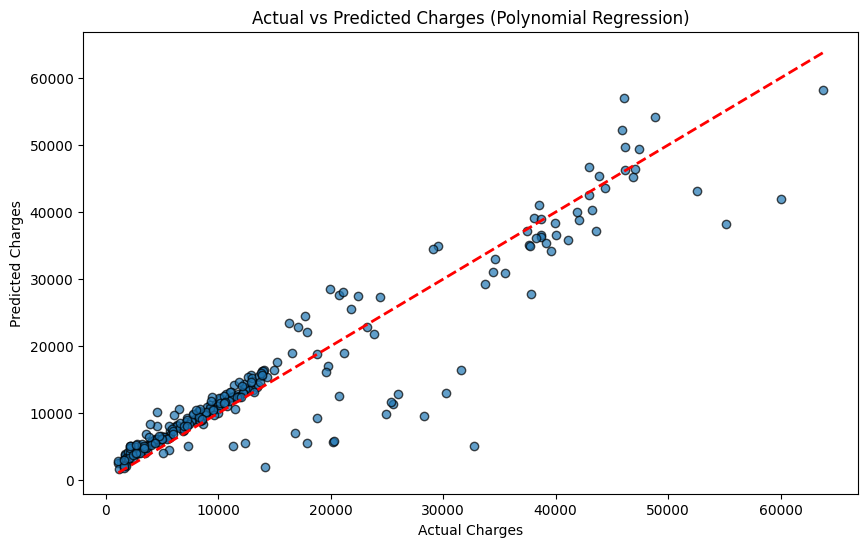

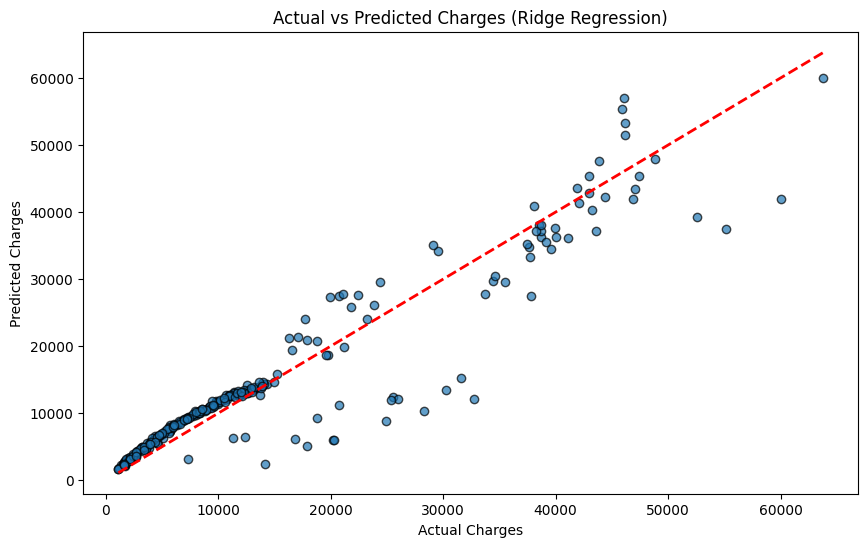

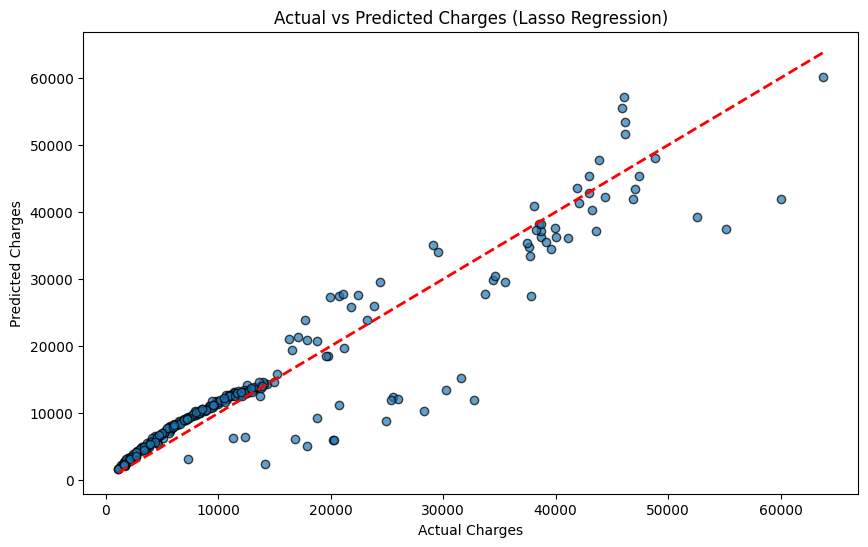

In [385]:
# Comparar los valores reales vs predichos para cada modelo
models = {
    'Polynomial Regression': (y_test, y_pred_poly),
    'Ridge Regression': (y_test, y_pred_ridge),
    'Lasso Regression': (y_test, y_pred_lasso)
}

for model_name, (actual, predicted) in models.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(actual, predicted, edgecolor='k', alpha=0.7)
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], color='r', linestyle='--', linewidth=2)
    plt.xlabel('Actual Charges')
    plt.ylabel('Predicted Charges')
    plt.title(f'Actual vs Predicted Charges ({model_name})')
    plt.show()

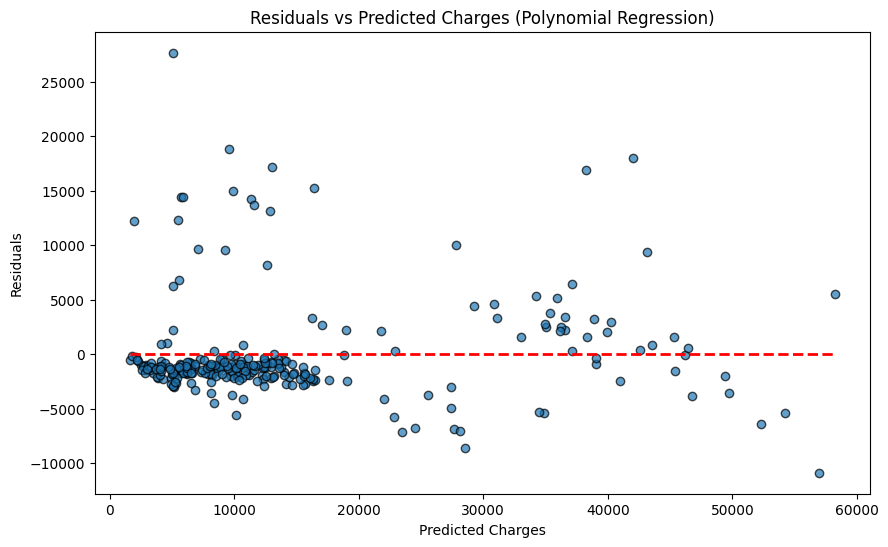

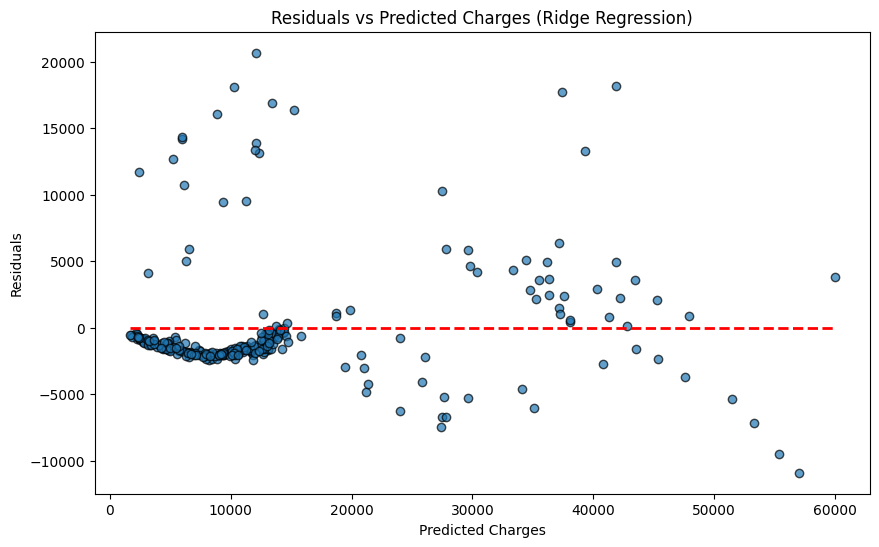

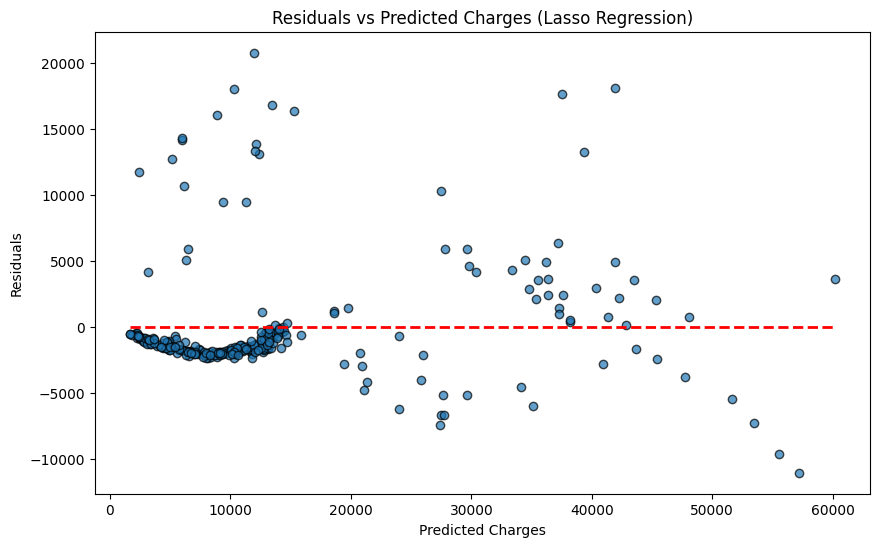

In [386]:
# Gráfico de los errores residuales para cada modelo
for model_name, (actual, predicted) in models.items():
    residuals = actual - predicted
    plt.figure(figsize=(10, 6))
    plt.scatter(predicted, residuals, edgecolor='k', alpha=0.7)
    plt.hlines(y=0, xmin=min(predicted), xmax=max(predicted), color='r', linestyle='--', linewidth=2)
    plt.xlabel('Predicted Charges')
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs Predicted Charges ({model_name})')
    plt.show()


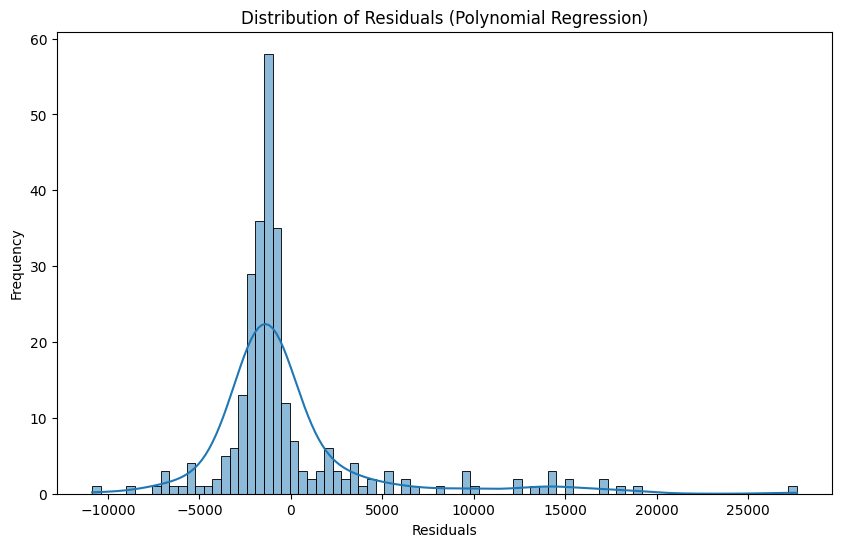

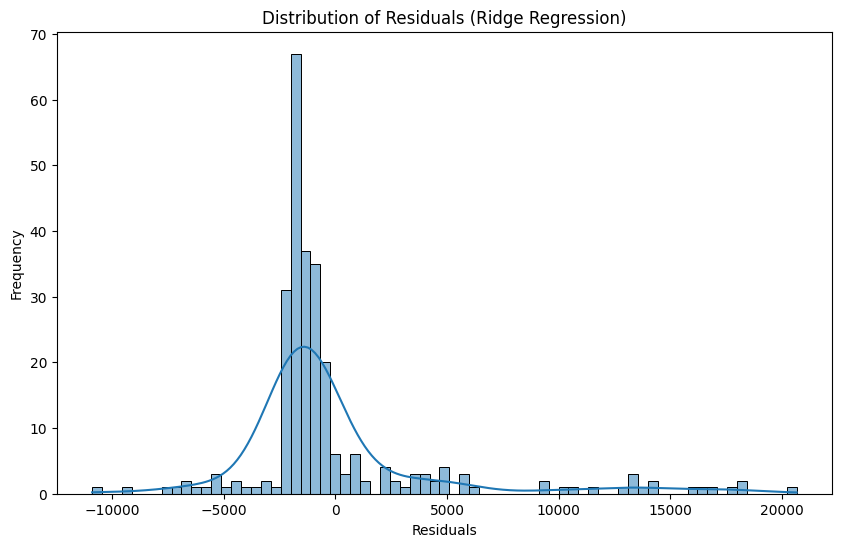

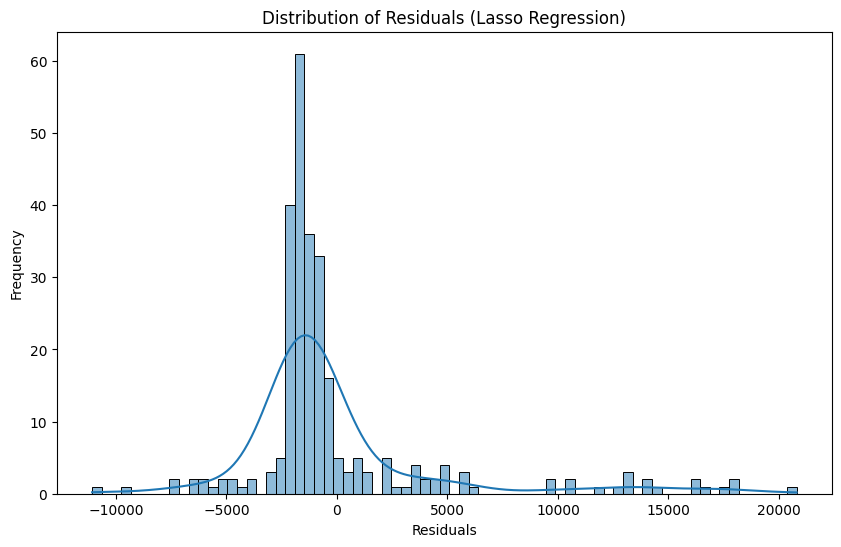

In [387]:
# Histograma de los residuos para cada modelo
for model_name, (actual, predicted) in models.items():
    residuals = actual - predicted
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title(f'Distribution of Residuals ({model_name})')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()
